<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 4 Part 1: Optical System Modeling with Aberrations</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Group #: ___________   Team Members: _______________  </b></p>

<p style="text-align: left;" ><font size="+1"><b>Objectives</b></p>

<div class="alert alert-block alert-warning">
<font color=black>

- Understand and be able to model optical phase aberrations
- Build realistic models of optical systems
- Understand basic concepts of optimization 
- Identify system parameters in real data through an optimization process

</font> 
</div>

<p style="text-align: left;" ><font size="+1"><b>Introduction / Basic Rules</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>

In this lab, you will extend the ideal optical model from Lab 3 to a more realistic optical system. In Part 1 of this lab, we will learn to model optical phase aberrations, and then look at how aberrations affect the PSF and the final image. <br/>
    
In Part 2, we will collect real data and apply the model you build in Part 1 to identify system parameters through an optimization process. <br/>
    
Recall from class notes and discussions that our new model of the coherent PSF is:
\begin{equation}
\large
h(u,v) = \frac{A}{\lambda z_i} \int_{-\infty}^{\infty} \int_{-\infty}^{\infty} \mathcal{P}(x,y) \hspace{5px} \exp \bigg\{ -i \frac{2\pi}{\lambda z_i} (ux+vy)\bigg\} dx dy
\large
\end{equation} 
    
\begin{equation}
\large
\mathcal{P}(u,v) = \underbrace {P(u,v)}_{\text{amplitude}} \hspace{5px} \underbrace {\exp \big[ i \frac{2\pi}{\lambda} W(u,v) \big]}_{\text{phase}}
\large
\end{equation} 
    
And remember that we are adopting a generalized pupil function with two parts: amplitude and phase.
</font> 
</div>

# Generalized Pupil Function - Amplitude

<div class="alert alert-block alert-warning">
<font color=black>

Since our image is measured on the image plane (camera), it is easier for modeling purposes if we scale all the axes to the image plane. That is, we consider spatial domain and Fourier domain axes with a sampling interval based on the pixel size of the camera, 5.3 $\mu$m. <br/>

</font> 
</div>

<div class="alert alert-block alert-success">
<font color=black>

1. Specify the spatial domain and frequency domain axes ($x, y, f_x, f_y$) of a 1001 by 1001 image with sampling interval 5.3 $\mu$m. Write this code below:
</font> 
</div>

In [ ]:
# import python packages
import cma
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
plt.rcParams['font.size'] = 16   # set the font size globally

In [2]:
# find sampling frequency 
N = 1001; # size of both images are 201x201
a = 0.0053 # sampling period
fs = (1 / (N*a) * N) # sampling frequency
fx = np.linspace((-fs/2)*((N-1)/N), (fs/2)*((N-1)/N), N)
fy = np.linspace((-fs/2)*((N-1)/N),(fs/2)*((N-1)/N),N)
lim = (N-1)/2 * a
# spatial domain
x = np.linspace(-lim,lim,N)
y = np.linspace(-lim,lim,N)

# printing values 
print("x domain ", x)
print("y domain ", y)
print("fx domain ", fx)
print("fy domain ", fy)


x domain  [-2.65   -2.6447 -2.6394 ...  2.6394  2.6447  2.65  ]
y domain  [-2.65   -2.6447 -2.6394 ...  2.6394  2.6447  2.65  ]
fx domain  [-94.24537726 -94.05688651 -93.86839576 ...  93.86839576  94.05688651
  94.24537726]
fy domain  [-94.24537726 -94.05688651 -93.86839576 ...  93.86839576  94.05688651
  94.24537726]


<div class="alert alert-block alert-warning">
<font color=black>

If one takes the Fourier transform of both sides of the above expression for the coherent PSF, we can obtain the Fourier transform of $h$ directly. Specifically, this can be achieved by a change of axes in the pupil function.  For example, for a circular aperture of radius $r$, the amplitude of the <u> Fourier transform of $h$</u> (denoted $H$) is given by:
    
- `FX, FY = np.meshgrid(-lambd*zi*fx, -lambd*zi*fy)`. Note that `lambda` is a Python keyword reserved for anonymous function, so we will try to avoid naming a variable after it.
- `H = (FX**2 + FY**2) < r**2`
                              
`lambd` is the wavelength (e.g., 540 nm for “green” light and 600 nm for “red” light) and the `zi` is image distance (i.e., the distance from the pupil to the image plane). For now, let’s assume `zi` is 300 mm, and `r` is 2mm.
</font> 
</div>

<div class="alert alert-block alert-success">
<font color=black>

2. Simulate the PSF (recall that incoherent PSF is $|h|^2$) of the red and green light. Show the PSF and log10 PSF images below. Zoom in on the central 201 by 201 elements and use colormap `jet`. <br/>
<u> (Note: Throughout this lab, please use colormap `jet` for PSF and OTF images and colormap `gray` for all simulated object images.) </u>
</font> 
</div>

Text(0, 0.5, 'y values (mm)')

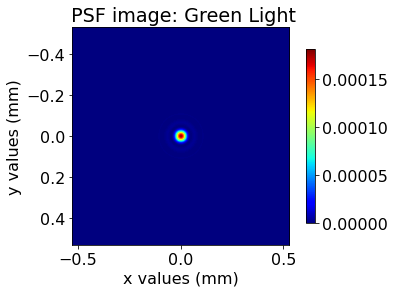

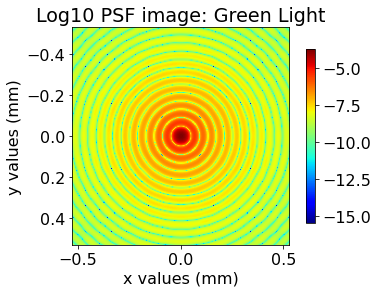

In [3]:
from numpy.fft import fft2, fftshift, ifftshift, ifft2
# Green Light
lambd = 540e-6 # conversion to mm
zi = 300
r = 2
FX, FY = np.meshgrid(-lambd*zi*fx, -lambd*zi*fy)
green_H = (FX**2 + FY**2) < r**2

# find h by taking inverse fourier 
green_psf = np.abs(fftshift(ifft2(ifftshift(green_H))))**2
p = plt.imshow(green_psf[400:601,400:601], cmap = "jet", extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.title(" PSF image: Green Light")
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)") 

plt.figure()
p = plt.imshow(np.log10(green_psf[400:601,400:601]), cmap = "jet", extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.title("Log10 PSF image: Green Light")
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)") 



Text(0, 0.5, 'y values (mm)')

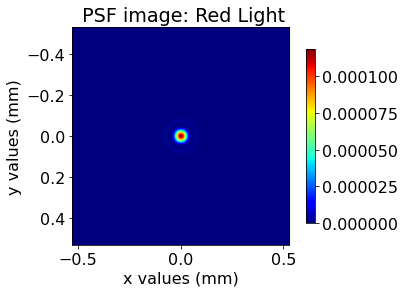

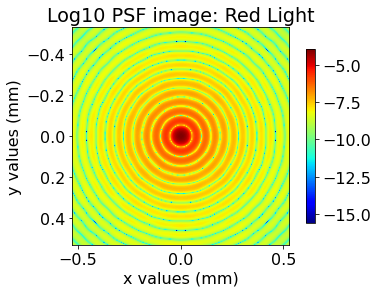

In [4]:
# Red Light
lambd = 600e-6 # conversion to mm
zi = 300
r = 2
FX, FY = np.meshgrid(-lambd*zi*fx, -lambd*zi*fy)
red_H = (FX**2 + FY**2) < r**2

# find h by taking inverse fourier 
red_psf = np.abs(fftshift(ifft2(ifftshift(red_H))))**2
p = plt.imshow(red_psf[400:601,400:601], cmap = "jet", extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.title(" PSF image: Red Light")
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)") 

plt.figure()
p = plt.imshow(np.log10(red_psf[400:601,400:601]), cmap = "jet", extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.title("Log10 PSF image: Red Light")
plt.xlabel("x values (mm)")
plt.ylabel("y values (mm)") 

<div class="alert alert-block alert-success">
<font color=black>

3. Simulate what the star pattern looks like when the system is illuminated with red light and green light. What is the difference between the two images? How does wavelength affect the resolution of the system?
</font> 
</div>

Text(0.5, 1.0, 'Zoomed In Green Filtered Star Image')

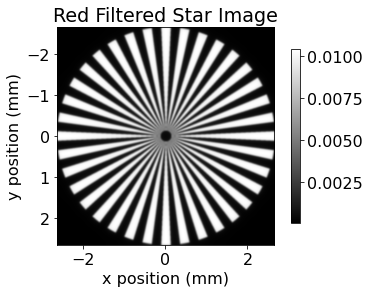

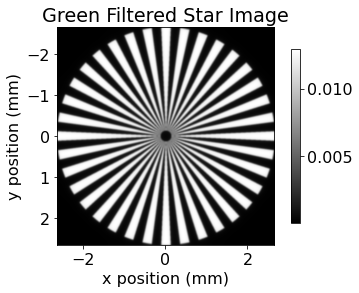

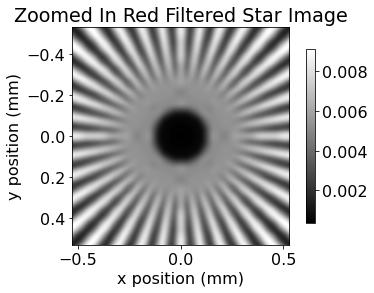

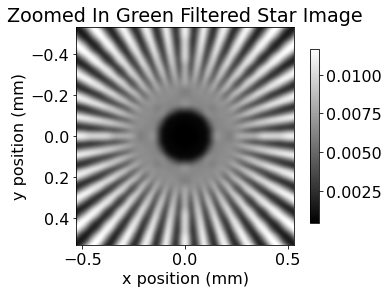

In [5]:
from functions import make_star
star = make_star(x,y)
fft_star = fftshift(fft2(ifftshift(star)))
red_OTF = fftshift(fft2(ifftshift(red_psf)))
green_OTF = fftshift(fft2(ifftshift(green_psf)))
red_star = fftshift(ifft2(ifftshift(red_OTF*fft_star)))
green_star = fftshift(ifft2(ifftshift(green_OTF*fft_star)))
p=plt.imshow(np.abs(red_star), cmap='gray',  extent = [-lim, lim, lim, -lim])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Red Filtered Star Image")

plt.figure()
p=plt.imshow(np.abs(green_star), cmap='gray', extent = [-lim, lim, lim, -lim])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Green Filtered Star Image")

plt.figure()
p=plt.imshow(np.abs(red_star[400:601,400:601]), cmap='gray',  extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Zoomed In Red Filtered Star Image")

plt.figure()
p=plt.imshow(np.abs(green_star[400:601,400:601]), cmap='gray',  extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Zoomed In Green Filtered Star Image")

The red filtered image is blurrier and has worse resolution than the the green filtered one. The red filtered image blurs out more of the high frequency line pairs in the center of the star than the green filtered. As seen from the PSF images, the width of the red filtered PSF was greater than the green filtered, so the OTF width would be less than for the red filtered image. Lower OTF widths lead to blurrier images with worse resolution, so by increasing wavelength, image resolution decreases.

Additionally, if we look at the equation, we see two places where the wavelength affects the psf function: one as a constant in front of the integral and another within the integral as an exponent. The wavelength in the exponent has a greater impact on the psf function as we are raising e to the power of -(K/wavelength) where K is a placeholder for the other variables in the exponent. Thus, as the wavelength increases, the psf width also increases, leading to a decrease in OTF width. As we know, a decreased OTF width leads to a decreased resolution as it does not allow high frequencies to pass through, meaning that higher wavelength filters lead to lower resolution images.

# Generalized Pupil Function - Phase 

<div class="alert alert-block alert-warning">
<font color=black>

Download `zernike.py` and `zernike_index.npy` from Blackboard Lab 4 Course Content. The zernike function yields the weighted sum of multiple Zernike polynomials. You may import the `zernike` function using the following command:

`from zernike import zernike`

The syntax of the function is as follows: <br/>

`z_sum = zernike(-lambd*zi*fx/r, -lambd*zi*fy/r, mode_indices, coefs)`
    
where `mode_indices` a vector of the mode indices, and `coefs` are the coefficients for the Zernike polynomials at the corresponding mode index.
</font> 
</div>

In [6]:
from zernike import zernike

<div class="alert alert-block alert-warning">
<font color=black>

In the notes, Zernike polynomials are indicated by $Z_n^m$, where $n$ is the order, and $m$ is the frequency. The mode index `i` (using the Noll index convention) is another way of indexing the polynomials and is related to $n$,$m$ via the following table for the few polynomials we will be using today. 
</font> 
</div>

<img src="Lab4\Zernike.png" style="width:800px">

<div class="alert alert-block alert-warning">
<font color=black>

For example, to get the Zernike polynomial of x-tilt of coefficient 1, defocus of coefficient 2, and y-coma of coefficient 3, you could specify the `mode_indices` and `coefs` as follows: 
    
`mode_indices = [2, 4, 7]` <br/>
`coefs = [1, 2, 3]`
    
The phase portion of the Fourier transform of `h` is then given by <br/>
`np.exp(-1j*2*np.pi*z_sum)`<br/>
    
To combine the amplitude and phase, we can do the following, which gives us the Fourier transform of $h$ with phase aberrations: <br/>
`H*np.exp(-1j*2*np.pi*z_sum)`<br/>

You can then compute $h$ via an inverse Fourier transform, take the absolute value squared to obtain the incoherent point spread function. <br/>

Now let’s simulate several aberrations and see how they affect the image. <u>For all simulations below, set the wavelength to green at 540 nm.</u> Keep system parameters like pupil radius and distance from lens to camera the same as the red/green PSF experiment above. <br/>
</font> 
</div>

<div class="alert alert-block alert-success">
<font color=black>

1. Simulate an x-tilt of coefficient 0.5. Show images of the PSF and log10 PSF, both zoomed in on the central 201 by 201 elements. Also show the absolute value of the OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image.

</font> 
</div>

Text(0.5, 1.0, 'Star Pattern, xtilt = 0.5')

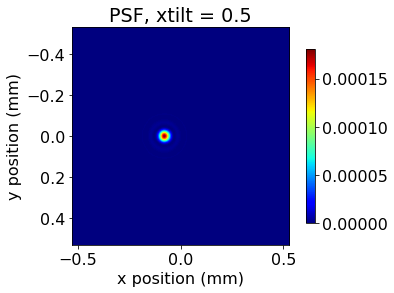

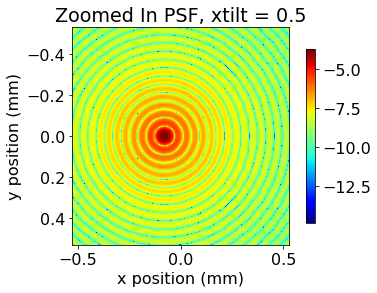

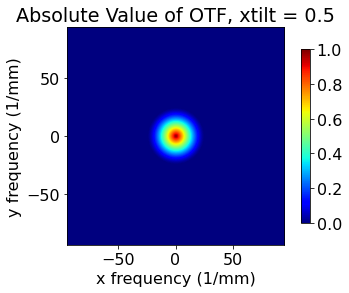

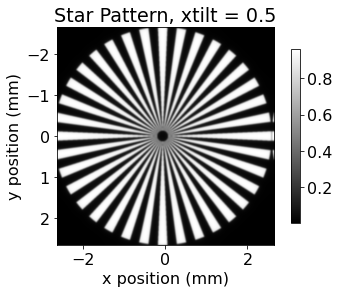

In [29]:
lambd = 540e-6 # conversion to mm
zi = 300
r = 2
FX, FY = np.meshgrid(-lambd*zi*fx, -lambd*zi*fy)
green_H = (FX**2 + FY**2) < r**2

coefs = [0.5]
mode_indices = [2]
z_sum = zernike(-lambd*zi*fx/r, -lambd*zi*fy/r, mode_indices, coefs)
fft_H = green_H.astype("double")*np.exp(-1j*2*np.pi*z_sum)
PSF = np.abs(fftshift(ifft2(ifftshift(fft_H)))) ** 2
OTF = fftshift(fft2(ifftshift(PSF))) 
OTF = OTF / OTF[500,500] # normalized OTF
star1 = fftshift(ifft2(ifftshift(OTF*fft_star))) # star pattern

plt.figure()
p=plt.imshow(PSF[400:601,400:601], cmap='jet',extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("PSF, xtilt = 0.5")

plt.figure()
p=plt.imshow(np.log10(PSF[400:601,400:601]), cmap='jet', extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Zoomed In PSF, xtilt = 0.5")

plt.figure()
p=plt.imshow(np.abs(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Absolute Value of OTF, xtilt = 0.5")

plt.figure()
p=plt.imshow(np.abs(star1), cmap='gray', extent = [-lim, lim, lim, -lim])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Star Pattern, xtilt = 0.5")

The aberration in this image is an x-tilt of 0.5, this positive aberration causes the pinhole image (PSF) to be shifted to the left from the original center. The image as a whole stays the same besides the leftward shift. Through experimentation it was also seen that a positive coefficient resulted in a leftward shift whereas a negative coefficient resulted in a rightward shift. The star pattern is also shifted leftwards, but it seems as though the portion of the star pattern that is cut off by the shift is wrapping around and can be seen on the right side of the image. 

<div class="alert alert-block alert-success">
<font color=black>

2. Simulate an x-tilt of coefficient -1.3 and a y-tilt of coefficient 0.7. Show the PSF and log10 PSF, both zoomed in on the central 201 by 201 elements. Also plot the absolute value of the OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image and compare to the previously simulated aberration.

</font> 
</div>

Text(0.5, 1.0, 'Star Pattern, xtilt = -1.3 & ytilt = 0.7')

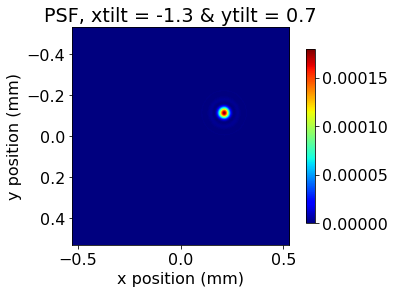

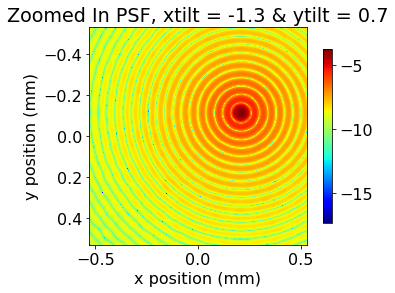

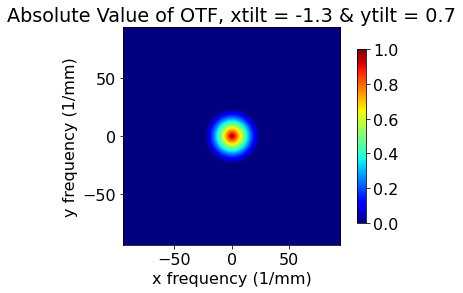

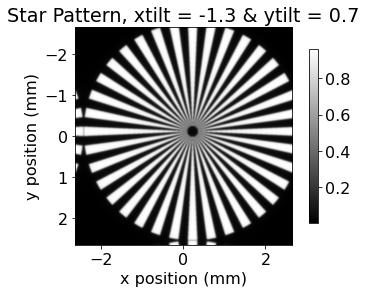

In [30]:
coefs = [-1.3, 0.7]
mode_indices = [2,3]
z_sum = zernike(-lambd*zi*fx/r, -lambd*zi*fy/r, mode_indices, coefs)
fft_H = green_H.astype("double")*np.exp(-1j*2*np.pi*z_sum)
PSF = np.abs(fftshift(ifft2(ifftshift(fft_H)))) ** 2
OTF = fftshift(fft2(ifftshift(PSF))) 
OTF = OTF / OTF[500,500] # normalized OTF
star2 = fftshift(ifft2(ifftshift(OTF*fft_star))) # star pattern

plt.figure()
p=plt.imshow(PSF[400:601,400:601], cmap='jet', extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("PSF, xtilt = -1.3 & ytilt = 0.7")

plt.figure()
p=plt.imshow(np.log10(PSF[400:601,400:601]), cmap='jet', extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Zoomed In PSF, xtilt = -1.3 & ytilt = 0.7")

plt.figure()
p=plt.imshow(np.abs(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Absolute Value of OTF, xtilt = -1.3 & ytilt = 0.7")

plt.figure()
p=plt.imshow(np.abs(star2), cmap='gray', extent = [-lim, lim, lim, -lim])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Star Pattern, xtilt = -1.3 & ytilt = 0.7")


In this system, the value of the xtilt was -1.3, causing the PSF to be shifted to right. On top of this, there was also a ytilt of 0.7, causing the PSF to be shifted upwards. The abberation values are different in this system as compared to the previous, but the same trends are seen (xtilts cause a shift in the x direction, ytilts cause a shift in the y direction) The magnitude of the xtilt in this image is greater than the magnitude of the ytilt, so we see a greater shift in the x-direction as expected. The same star pattern effect from the previous question is more pronounced in this system. As the xtilt is greater in magnitude than the previous question, we see a greater shift and consequently more of the cut off image wrapped around. In this case the wrap around is shown on the left side of the image because the x-tilt was negative. The same effect is seen at the bottom of the star pattern as there was also a y-tilt in this image, causing an upwards shift which resulting in the cut off portion of the star pattern wrapping around and being shown at the bottom. 

<div class="alert alert-block alert-success">
<font color=black>

3. Simulate a defocus of coefficient `1/(np.sqrt(3)*2)`, (This number represents exactly one wavelength of defocus). Show the PSF and log10 PSF, both zoomed in on the central 201 by 201 elements. Also plot the BOTH the real values and absolute values of the OTF, as well as the star pattern blurred by this system. What do you observe in the star pattern in terms of the bright and dark spokes as you go from the periphery to the center of the image? What is causing this? (Hint: look at the real-valued OTF.)

</font> 
</div>

Text(0.5, 1.0, 'Star Pattern,  defocus = 1/(sqrt(3)*2)')

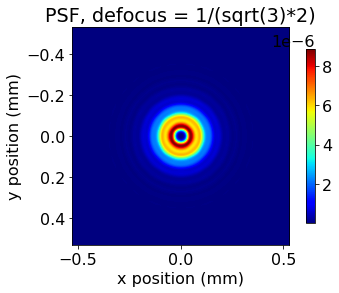

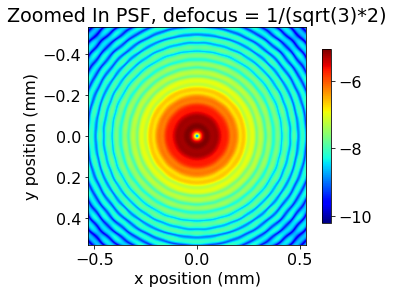

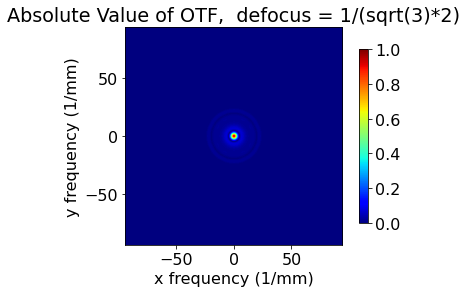

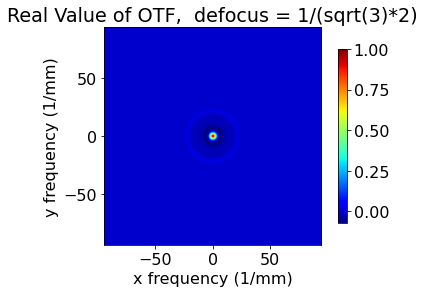

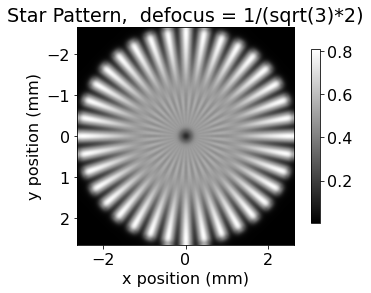

In [31]:
coefs = [1/(np.sqrt(3)*2)]
mode_indices = [4]
z_sum = zernike(-lambd*zi*fx/r, -lambd*zi*fy/r, mode_indices, coefs)
fft_H = green_H.astype("double")*np.exp(-1j*2*np.pi*z_sum)
PSF = np.abs(fftshift(ifft2(ifftshift(fft_H)))) ** 2
OTF = fftshift(fft2(ifftshift(PSF))) 
OTF = OTF / OTF[500,500] # normalized OTF
star2 = fftshift(ifft2(ifftshift(OTF*fft_star))) # star pattern

plt.figure()
p=plt.imshow(PSF[400:601,400:601], cmap='jet',extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("PSF, defocus = 1/(sqrt(3)*2)")

plt.figure()
p=plt.imshow(np.log10(PSF[400:601,400:601]), cmap='jet', extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Zoomed In PSF, defocus = 1/(sqrt(3)*2)")

plt.figure()
p=plt.imshow(np.abs(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Absolute Value of OTF,  defocus = 1/(sqrt(3)*2)")

plt.figure()
p=plt.imshow(np.real(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Real Value of OTF,  defocus = 1/(sqrt(3)*2)")

plt.figure()
p=plt.imshow(np.abs(star2), cmap='gray', extent = [-lim, lim, lim, -lim])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Star Pattern,  defocus = 1/(sqrt(3)*2)")

The aberration in this system caused the defocus to be shifted by 1 wavelength. In the star pattern we see that this abberation evidently caused the whole star pattern to be blurrier, as the edges of the pattern are blurred. However, in addition to this, the defocus shift caused an extra set of circular spokes to be formed in the center of the pattern. This can be seen as we travel from the periphery towards the center. If we look at the real valued OTF, it can be seen that there is an extra low frequency ring on the outside as compared to the other OTFs that we saw in previous questions. Essentially, there are two low frequency rings in the OTF before the OTF reaches the high frequency center. This makes sense with what we see in the star image as there two spoke images (generally the more low frequency images) before reaching the center. The spread of the OTF is also smaller than previous images, which contributes to the blurring of the image as we know a smaller OTF spread means a lower resolution image.

<div class="alert alert-block alert-success">
<font color=black>

4. Simulate a defocus of coefficient 0.5. Show the PSF and log10 PSF, both zoomed in on the central 201 by 201 elements. Also plot the real values and absolute values of the OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image and compare to the previous defocus simulation.

</font> 
</div>

Text(0.5, 1.0, 'Star Pattern, defocus = 0.5')

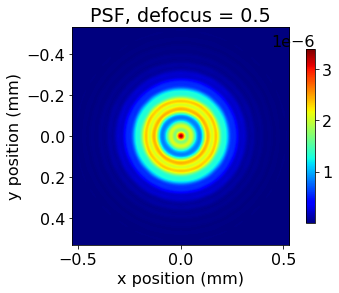

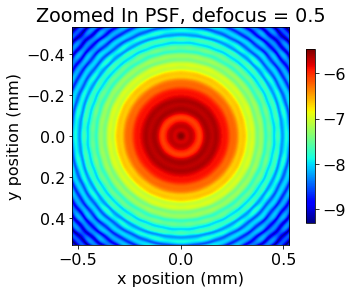

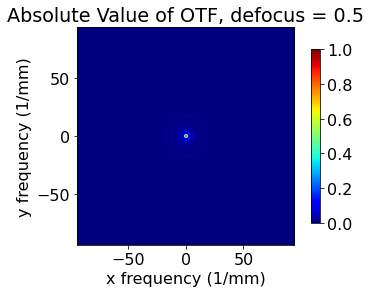

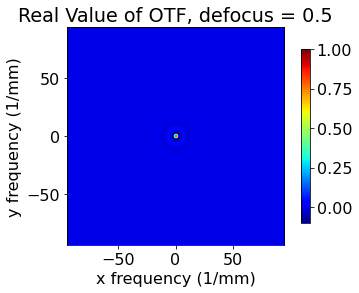

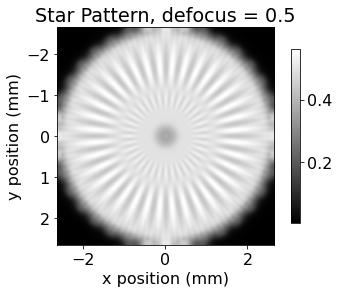

In [32]:
coefs = [0.5]
mode_indices = [4]
z_sum = zernike(-lambd*zi*fx/r, -lambd*zi*fy/r, mode_indices, coefs)
fft_H = green_H.astype("double")*np.exp(-1j*2*np.pi*z_sum)
PSF = np.abs(fftshift(ifft2(ifftshift(fft_H)))) ** 2
OTF = fftshift(fft2(ifftshift(PSF))) 
OTF = OTF / OTF[500,500] # normalized OTF
star2 = fftshift(ifft2(ifftshift(OTF*fft_star))) # star pattern

plt.figure()
p=plt.imshow(PSF[400:601,400:601], cmap='jet',extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("PSF, defocus = 0.5")

plt.figure()
p=plt.imshow(np.log10(PSF[400:601,400:601]), cmap='jet', extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Zoomed In PSF, defocus = 0.5")

plt.figure()
p=plt.imshow(np.abs(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Absolute Value of OTF, defocus = 0.5")

plt.figure()
p=plt.imshow(np.real(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Real Value of OTF, defocus = 0.5")

plt.figure()
p=plt.imshow(np.abs(star2), cmap='gray', extent = [-lim, lim, lim, -lim])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Star Pattern, defocus = 0.5")

The aberration in this system caused the defocus to be shifted by 0.5, which is a greater shift than the previous question. In the star pattern we see that this abberation evidently caused the whole star pattern to be even blurrier than the previous question, as the edges of the pattern are barely even distinguishable. In addition to this, we see a more pronounced version of the same trend as earlier where the defocus shift caused an extra set of circular spokes to be formed. In this case the extra spokes can be seen starting from the periphery all the way to the center. At least 3 sets of spokes can be clearly visualized. If we look at the real valued OTF, it can be seen that there is an extra low frequency ring on the outside as compared to the previous OTF, and the spread of the OTF is even smaller than before. This causes lower resolution and blurring to occur as well as the extra spokes towards the center of the image. 

<div class="alert alert-block alert-success">
<font color=black>

5. Simulate a y-coma of coefficient 0.1. Show the PSF and log10 PSF images, both zoomed in on the central 201 by 201 elements. Also plot the real values and absolute values of the OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image.

</font> 
</div>

Text(0.5, 1.0, 'Star Pattern, ycoma = 0.1')

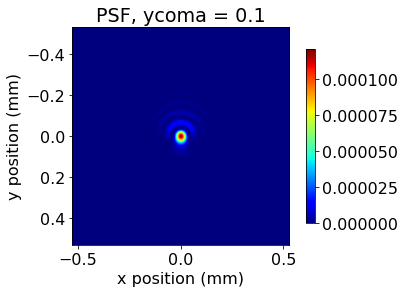

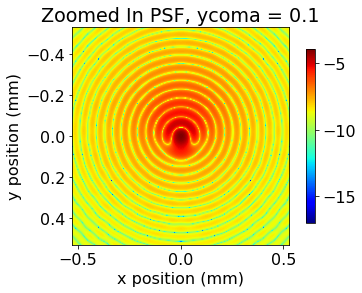

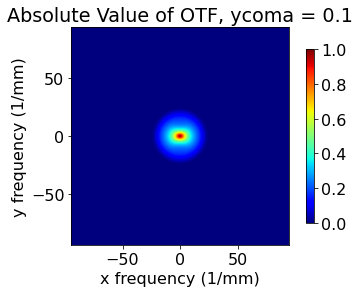

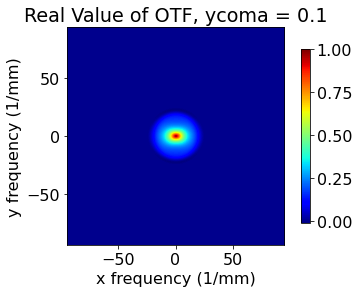

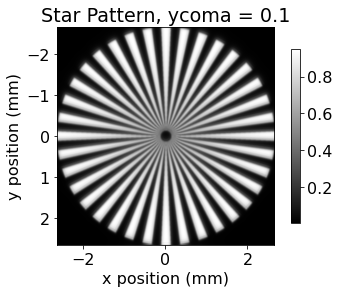

In [33]:
coefs = [0.1]
mode_indices = [7]
z_sum = zernike(-lambd*zi*fx/r, -lambd*zi*fy/r, mode_indices, coefs)
fft_H = green_H.astype("double")*np.exp(-1j*2*np.pi*z_sum)
PSF = np.abs(fftshift(ifft2(ifftshift(fft_H)))) ** 2
OTF = fftshift(fft2(ifftshift(PSF))) 
OTF = OTF / OTF[500,500] # normalized OTF
star2 = fftshift(ifft2(ifftshift(OTF*fft_star))) # star pattern

plt.figure()
p=plt.imshow(PSF[400:601,400:601], cmap='jet',extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("PSF, ycoma = 0.1")

plt.figure()
p=plt.imshow(np.log10(PSF[400:601,400:601]), cmap='jet', extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Zoomed In PSF, ycoma = 0.1")

plt.figure()
p=plt.imshow(np.abs(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Absolute Value of OTF, ycoma = 0.1")

plt.figure()
p=plt.imshow(np.real(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Real Value of OTF, ycoma = 0.1")

plt.figure()
p=plt.imshow(np.abs(star2), cmap='gray', extent = [-lim, lim, lim, -lim])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Star Pattern, ycoma = 0.1")

<div class="alert alert-block alert-success">
<font color=black>

6. Simulate an x-coma of coefficient -0.2 together with a y-coma of coefficient 0.05. Show the PSF and log10 PSF images, both zoomed in on the central 201 by 201 elements. Also plot the real values and absolute values of the OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image and compare to the previously simulated aberration.

</font> 
</div>

Text(0.5, 1.0, 'Star Pattern, ycoma = 0.05 & xcoma = -0.2')

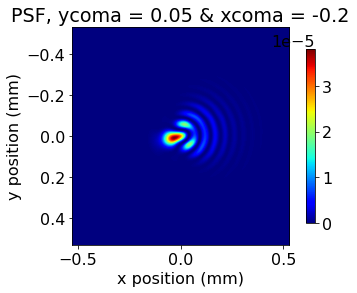

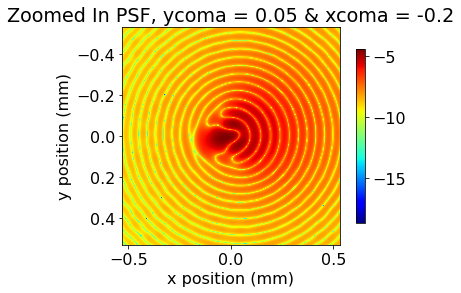

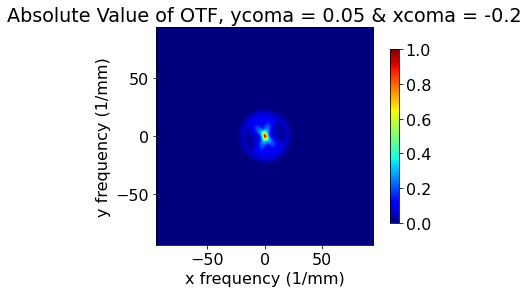

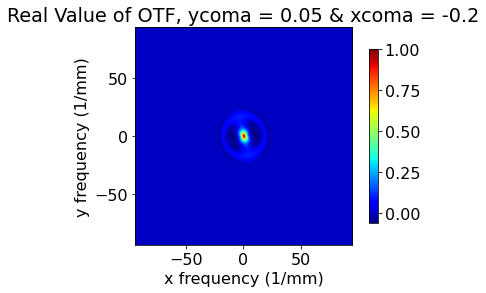

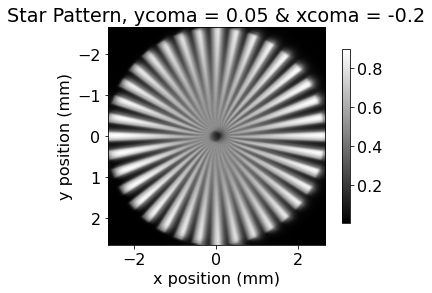

In [35]:
coefs = [0.05, -0.2]
mode_indices = [7, 8]
z_sum = zernike(-lambd*zi*fx/r, -lambd*zi*fy/r, mode_indices, coefs)
fft_H = green_H.astype("double")*np.exp(-1j*2*np.pi*z_sum)
PSF = np.abs(fftshift(ifft2(ifftshift(fft_H)))) ** 2
OTF = fftshift(fft2(ifftshift(PSF))) 
OTF = OTF / OTF[500,500] # normalized OTF
star2 = fftshift(ifft2(ifftshift(OTF*fft_star))) # star pattern

plt.figure()
p=plt.imshow(PSF[400:601,400:601], cmap='jet',extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("PSF, ycoma = 0.05 & xcoma = -0.2")

plt.figure()
p=plt.imshow(np.log10(PSF[400:601,400:601]), cmap='jet', extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Zoomed In PSF, ycoma = 0.05 & xcoma = -0.2")

plt.figure()
p=plt.imshow(np.abs(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Absolute Value of OTF, ycoma = 0.05 & xcoma = -0.2")

plt.figure()
p=plt.imshow(np.real(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Real Value of OTF, ycoma = 0.05 & xcoma = -0.2")

plt.figure()
p=plt.imshow(np.abs(star2), cmap='gray', extent = [-lim, lim, lim, -lim])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Star Pattern, ycoma = 0.05 & xcoma = -0.2")

<div class="alert alert-block alert-success">
<font color=black>

7. One last simulation! Let’s look at the composition of many aberrations together. Simulate mode indices `[4, 5, 6, 7, 11]` with coefficients `[0.1, -0.2, 0.05, 0.2, 0.1]`. Show the PSF and log10 PSF images, both zoomed in on the central 201 by 201 elements. Also plot the real values and absolute values of OTF, as well as the star pattern blurred by this system. Describe the effect of this aberration on the image.

</font> 
</div>

Text(0.5, 1.0, 'Star Pattern')

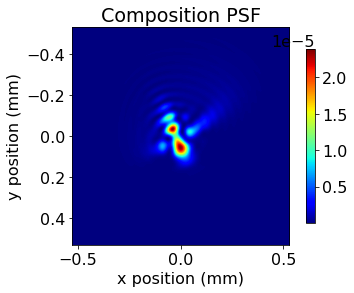

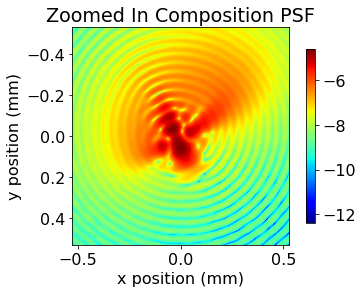

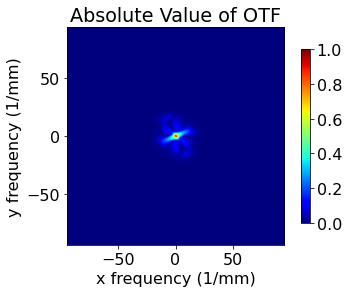

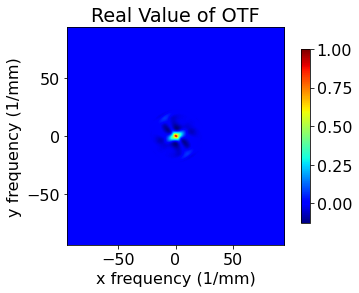

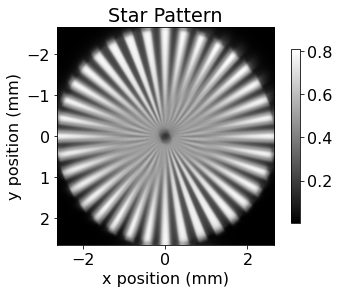

In [36]:
coefs = [0.1, -0.2, 0.05, 0.2, 0.1]
mode_indices = [4, 5, 6, 7, 11]
z_sum = zernike(-lambd*zi*fx/r, -lambd*zi*fy/r, mode_indices, coefs)
fft_H = green_H.astype("double")*np.exp(-1j*2*np.pi*z_sum)
PSF = np.abs(fftshift(ifft2(ifftshift(fft_H)))) ** 2
OTF = fftshift(fft2(ifftshift(PSF))) 
OTF = OTF / OTF[500,500] # normalized OTF
star2 = fftshift(ifft2(ifftshift(OTF*fft_star))) # star pattern

plt.figure()
p=plt.imshow(PSF[400:601,400:601], cmap='jet',extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Composition PSF")

plt.figure()
p=plt.imshow(np.log10(PSF[400:601,400:601]), cmap='jet', extent = [x[400], x[600], y[600], y[400]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Zoomed In Composition PSF")

plt.figure()
p=plt.imshow(np.abs(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Absolute Value of OTF")

plt.figure()
p=plt.imshow(np.real(OTF), cmap='jet', extent = [fx[0], fx[1000], fy[0], fy[1000]])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x frequency (1/mm)")
plt.ylabel("y frequency (1/mm)")
plt.title("Real Value of OTF")

plt.figure()
p=plt.imshow(np.abs(star2), cmap='gray', extent = [-lim, lim, lim, -lim])
plt.colorbar(p, shrink=0.8)
plt.xlabel("x position (mm)")
plt.ylabel("y position (mm)")
plt.title("Star Pattern")